## Performing Sentimental Analysis on the Elon Musk tweets:-

## Importing Necessary Libraries:-

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re                                                                  
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import sys
from wordcloud import WordCloud

import warnings
warnings.filterwarnings(action = 'ignore')

In [60]:
musk_data = pd.read_csv('Elon_musk.csv', encoding = 'ISO-8859-1')
musk_data

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


## Performing Initial Analysis:-

In [3]:
musk_data.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [4]:
musk_data.shape

(1999, 2)

In [5]:
musk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [6]:
musk_data.isnull().sum()

Unnamed: 0    0
Text          0
dtype: int64

## Now, Data Cleaning:-

### Regular Expression:- Pattern matching

In [12]:
def clean_text(Text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    Text =  Text.lower()
    Text = re.sub('\[.*?\]', '',   Text)
    Text = re.sub('[%s]' % re.escape(string.punctuation), '',  Text)
    Text = re.sub('\w*\d\w*', '',   Text)
    Text = re.sub("[0-9" "]+"," ",  Text)
    Text = re.sub('[‘’“”…]', '',   Text)
    return   Text

clean = lambda x: clean_text(x)

In [13]:
musk_data['Text'] = musk_data.Text.apply(clean)
musk_data.Text

0                                            im an alien
1       idaacarmack ray tracing on cyberpunk with hdr ...
2                        joerogan spotify great interview
3                                  doge is underestimated
4       teslacn congratulations tesla china for amazin...
                              ...                        
1994    flcnhvy true it sounds so surreal but the nega...
1995    ppathole make sure to read ur terms amp condit...
1996                    teslagong ppathole samwise gamgee
1997                   ppathole altho dumb and dumber is 
1998                              progress update august 
Name: Text, Length: 1999, dtype: object

## Word Frequency:-

In [15]:
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhis\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [16]:
musk_data['Text']=musk_data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [17]:
musk_data["Text"]

0                                               im alien
1       idaacarmack ray tracing cyberpunk hdr nextleve...
2                        joerogan spotify great interview
3                                     doge underestimated
4       teslacn congratulations tesla china amazing ex...
                              ...                        
1994    flcnhvy true sounds surreal negative propagand...
1995    ppathole make sure read ur terms amp condition...
1996                    teslagong ppathole samwise gamgee
1997                           ppathole altho dumb dumber
1998                               progress update august
Name: Text, Length: 1999, dtype: object

### For top 20:-

In [18]:
freq_sw = pd.Series(" ".join(musk_data["Text"]).split()).value_counts()[:20]

In [19]:
freq_sw

spacex             239
amp                218
tesla              166
erdayastronaut     142
rt                 127
ppathole           123
flcnhvy            114
yes                 86
great               76
teslaownerssv       73
wholemarsblog       68
teslarati           59
its                56
haha                55
nasaspaceflight     55
good                51
launch              49
sure                43
yeah                41
would               40
dtype: int64

In [21]:
cv = CountVectorizer(min_df = 1,max_df=0.9)

In [22]:
cv

CountVectorizer(max_df=0.9)

In [23]:
x=cv.fit_transform(musk_data["Text"])

In [24]:
word_freq_df = pd.DataFrame({'team':cv.get_feature_names(),
                                                   'occurrences':np.asarray(x.sum(axis=0)).ravel().tolist()})

In [25]:
word_freq_df

,team,occurrences
0,aber,1
1,able,6
2,abo,1
3,aboard,1
4,abort,3
...,...,...
4456,zshauladventure,1
4457,zubinanary,1
4458,zwiebelbach,1
4459,zzcool,1


In [26]:
word_freq_df['frequency']=word_freq_df['occurrences']/np.sum(word_freq_df['occurrences']) #print(word_freq_df.sort('occurrences',ascending=False).hesd())

In [27]:
word_freq_df['frequency']

0       0.000075
1       0.000449
2       0.000075
3       0.000075
4       0.000224
          ...   
4456    0.000075
4457    0.000075
4458    0.000075
4459    0.000075
4460    0.000075
Name: frequency, Length: 4461, dtype: float64

In [28]:
word_freq_df

,team,occurrences,frequency
0,aber,1,0.000075
1,able,6,0.000449
2,abo,1,0.000075
3,aboard,1,0.000075
4,abort,3,0.000224
...,...,...,...
4456,zshauladventure,1,0.000075
4457,zubinanary,1,0.000075
4458,zwiebelbach,1,0.000075
4459,zzcool,1,0.000075


## Term Frequency Inverse Document Frequency (TFIDF):-

### Keeping top 1000 words:-

In [30]:
cv =  TfidfVectorizer(stop_words='english',max_features=1000, max_df=0.5,smooth_idf=True)

In [31]:
doc_vec = cv.fit_transform(musk_data['Text'])

In [32]:
names_features = cv.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist,columns = names_features)

In [33]:
df

,able,abort,absolutely,access,accurate,actual,actually,adamklotz,add,adding,...,yahoofinance,yeah,year,years,yes,yesterday,yourfavgas,yup,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.356779,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## N - Grams:-

In [34]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),                                               #for tri-gram, put ngram_range=(3,3)
        max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [35]:
top2_words = get_top_n2_words(musk_data["Text"], n=200)                              #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head(50)

,Bi-gram,Freq
0,rt spacex,71
1,we re,26
2,spacex falcon,17
3,erdayastronaut spacex,16
4,crew dragon,13
5,pretty much,12
6,rt nasa,12
7,waemd spacex,11
8,you re,10
9,giga berlin,10


## Plotting B- Gram Plot:-

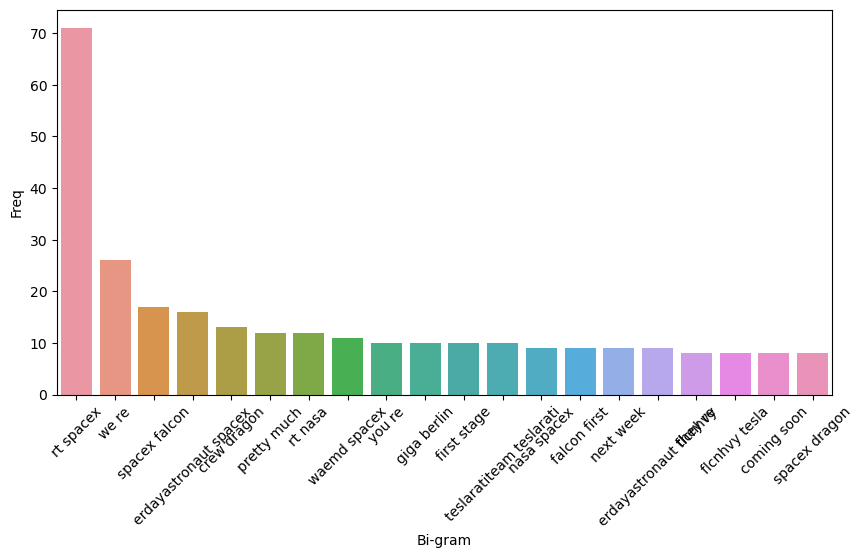

In [41]:
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])
plt.show()

## Plotting Tri - Gram Plot:-

In [42]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [45]:
top3_words = get_top_n3_words(musk_data["Text"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
top3_df

,Tri-gram,Freq
0,rt spacex falcon,17
1,falcon first stage,9
2,spacex falcon first,8
3,thesheetztweetz waemd spacex,8
4,course still love,7
...,...,...
195,completed full duration,2
196,raptor vacuum engine,2
197,we ve ever,2
198,zogfotpik samiralyateem idaacarmack,2


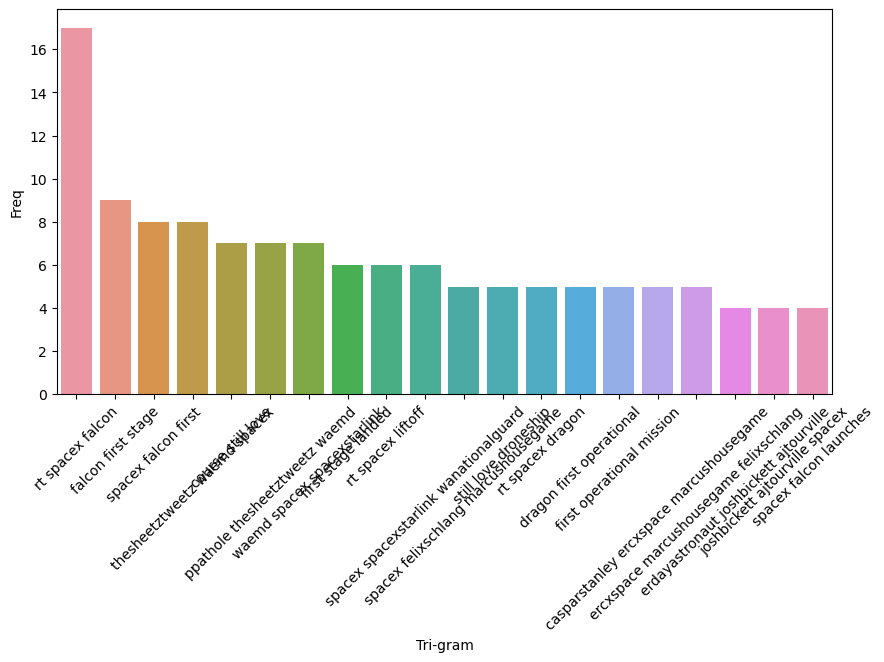

In [46]:
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])
plt.show()

## worldCloud:-

In [48]:
print(sys.executable)

C:\Users\abhis\anaconda3\python.exe


## From worldCloud import wordcloud:-

In [49]:
string_Total = " ".join(musk_data["Text"])

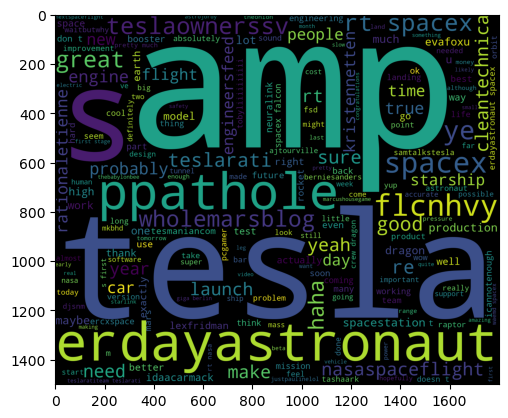

In [59]:
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(string_Total)
plt.imshow(wordcloud_stw)
plt.show()